<a href="https://colab.research.google.com/github/paulohenriquegf/DataSciencePratica/blob/main/Analisando%20os%20Dados%20do%20Airbnb%20(S%C3%A3o%20Francisco).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### Projeto realizado do curso de **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *São Francisco, California*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade São Francisco, California, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in San Francisco (good for visualisations).*

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/ca/san-francisco/2020-12-10/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,146,2,270,2020-11-24,1.95,1,215
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.79,1,365
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,19,2020-03-06,0.14,8,365
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,8,2018-09-12,0.10,8,365
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77525,-122.43637,Entire home/apt,768,5,28,2019-06-28,0.21,2,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Identificando a quantidade de linhas e colunas do dataset e ver o tipo de cada coluna.

O dataset possui 7087 linhas e 16 colunas



In [14]:
# identificar o volume de dados do DataFrame
print("Linhas: {}".format(df.shape[0]))
print("Colunas: {}".format(df.shape[1]))
print()
# verificar os tipos das colunas do dataset
df.dtypes

Linhas: 7087
Colunas: 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Devido aos valores faltantes, o dataset pode-se perder a sua qualidade. É necessário uma análise exploratória para identificar se tais valores ausentes são significativos comparado ao total de linhas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* A coluna `reviews_per_month` possui 24% dos seus valores faltantes. 
* E a coluna `last_review ` possui 24% dos seus valores faltantes. 

In [24]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

neighbourhood_group               100.000000
reviews_per_month                  24.029914
last_review                        24.029914
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
name                                0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para melhor identificação da distribuição das variáveis, irei plotar o histograma.

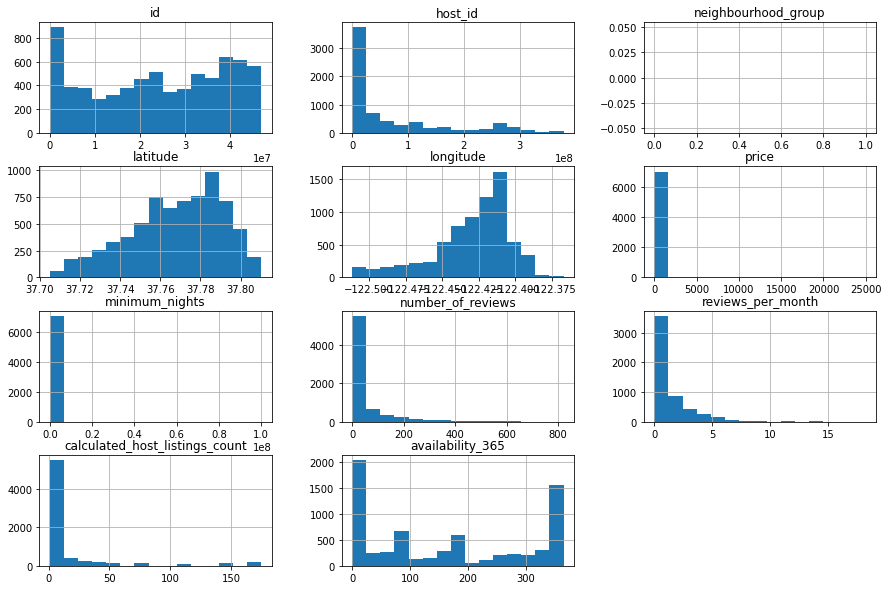

In [38]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [35]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7087.000000,7.087000e+03,7087.000000,5384.000000,7087.000000,7087.000000
mean,248.599125,1.412965e+04,43.570340,1.278689,17.056441,163.652603
std,817.421870,1.187869e+06,82.587244,1.654505,37.205195,142.376037
min,10.000000,1.000000e+00,0.000000,0.010000,1.000000,0.000000
25%,85.000000,2.000000e+00,1.000000,0.180000,1.000000,1.000000
50%,133.000000,3.000000e+01,7.000000,0.600000,2.000000,150.000000
75%,215.000000,3.000000e+01,46.000000,1.770000,11.000000,328.000000
max,25000.000000,1.000000e+08,821.000000,18.250000,175.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 215, porém seu valor máximo é 25000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.


Boxplot para Minimum_nights

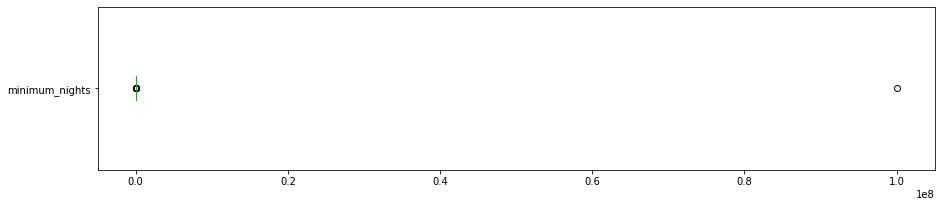


minimum_nights : valores acima de 30
303 entradas
4.2754%


In [54]:
#minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

#quantidade de valores acima de 1500 para price
print("\nminimum_nights : valores acima de 30")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Box plot para Price

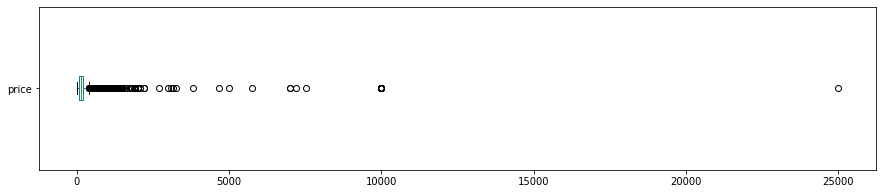


price : valores acima de 1000
115 entradas
1.6227%


In [52]:
#minimum_nights
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

#quantidade de valores acima de 1500 para price
print("\nprice : valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))


####Histograma sem outliers


Após indentificarmos os outliers nas variáveis `price`e`minimum_nights`, vamos limpar tais dados e plotar novamente o histograma

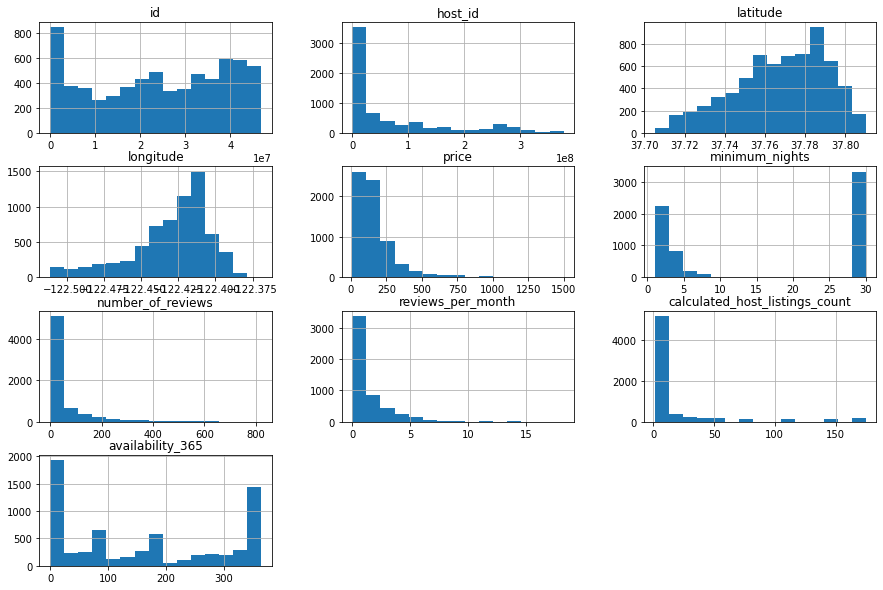

In [56]:
#removendo os outiliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#remover `neighbourhood_group`, pois está com os valores ausentes
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

A média é de 248

In [34]:
# ver a média da coluna `price``
df['price'].mean()

248.59912515874134

### **Q6. Qual a correlação existente entre as variáveis**

Com a correlação podemos identificar a semelhança entre duas variáveis, significa que existe relação entre duas coisas.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn`

In [57]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.207670,-0.099045,-0.157577,-0.105468,-0.050675
minimum_nights,-0.207670,1.000000,-0.343051,-0.404898,0.237233,0.291647
number_of_reviews,-0.099045,-0.343051,1.000000,0.756525,-0.183130,-0.018781
reviews_per_month,-0.157577,-0.404898,0.756525,1.000000,-0.189229,-0.022273
calculated_host_listings_count,-0.105468,0.237233,-0.183130,-0.189229,1.000000,0.043575
availability_365,-0.050675,0.291647,-0.018781,-0.022273,0.043575,1.000000


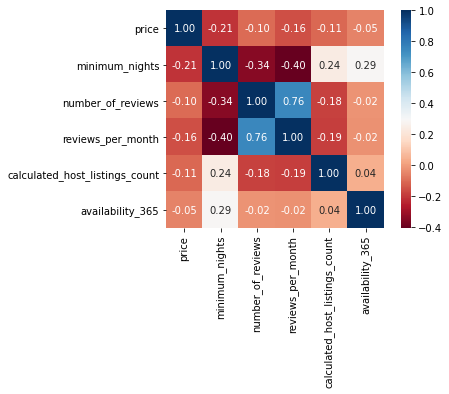

In [59]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**


Com a variável `room_type` podemos visualizar os tipos de imóveiis que estão disponíveis. Existem várias acomodações no Airbnb, desde quartos compartilhados à locais inteiros.

Utilizando o método `value_counts` podemos ver quantidade de cada um deles.

In [64]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    4054
Private room       2391
Shared room         184
Hotel room           90
Name: room_type, dtype: int64

In [66]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean['room_type'].value_counts() / df_clean.shape[0] * 100

Entire home/apt    60.336360
Private room       35.585653
Shared room         2.738503
Hotel room          1.339485
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**


Com o `groupby` é possivel agrupar as nossas entradas pelo bairro `neighbourhood`, e pegar a média desse agrupamento.

As 5 localidades mais caras são:


In [71]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(5)

neighbourhood
Diamond Heights    289.333333
Russian Hill       284.430769
Marina             281.365385
Pacific Heights    276.259843
Presidio           260.333333
Name: price, dtype: float64

Utilizando a biblioteca de visualização `plotly`, é possivel plotar cada ponto, considerando a `latitude` e `longitude`.

In [76]:
# plotar os imóveis pela latitude-longitude
import plotly.express as px
fig2 = px.scatter_mapbox(df_clean, lat="latitude", lon="longitude", 
                        hover_name="neighbourhood",
                        #hover_data= ["Nome"],
                        color='price',
                        #labels=['Telefone'],
                        color_discrete_sequence=px.colors.qualitative.G10,
                        zoom=11, height=500, width=800)              
fig2.update_layout(mapbox_style="carto-positron")
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="left",
    x=0.01
))
fig2.show()

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Considerando o nosso dataset limpo sem os outliers, a média é de 16 dias.

In [78]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

16.047179639827355

## Conclusões


Após a análise do nosso dataset, verificamos que existem muitos outliers em algumas variáveis.

Este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Para uma análise mais aprofundada, indica-se o conjunto de dados completos que pode ser encontrado no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) com o nome (`listings.csv.gz`).